# Solving TSP Using Dynamic Programming

## This notebook was created to serve a blog post by the same name, which will one day be written...

In [1]:
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def DP_TSP(distances_array):
    n = len(distances_array)
    all_points_set = set(range(n))

    # memo keys: tuple(sorted_points_in_path, last_point_in_path)
    # memo values: tuple(cost_thus_far, next_to_last_point_in_path)
    memo = {(tuple([i]), i): tuple([0, None]) for i in range(n)}
    queue = [(tuple([i]), i) for i in range(n)]

    while queue:
        prev_visited, prev_last_point = queue.pop(0)
        prev_dist, _ = memo[(prev_visited, prev_last_point)]

        to_visit = all_points_set.difference(set(prev_visited))
        for new_last_point in to_visit:
            new_visited = tuple(sorted(list(prev_visited) + [new_last_point]))
            new_dist = prev_dist + distances_array[prev_last_point][new_last_point]

            if (new_visited, new_last_point) not in memo:
                memo[(new_visited, new_last_point)] = (new_dist, prev_last_point)
                queue += [(new_visited, new_last_point)]
            else:
                if new_dist < memo[(new_visited, new_last_point)][0]:
                    memo[(new_visited, new_last_point)] = (new_dist, prev_last_point)

    optimal_path, optimal_cost = retrace_optimal_path(memo, n)
    
    return optimal_path, optimal_cost

In [3]:
def retrace_optimal_path(memo: dict, n: int) -> [[int], float]:
    points_to_retrace = tuple(range(n))

    full_path_memo = dict((k, v) for k, v in memo.items() if k[0] == points_to_retrace)
    path_key = min(full_path_memo.keys(), key=lambda x: full_path_memo[x][0])

    last_point = path_key[1]
    optimal_cost, next_to_last_point = memo[path_key]

    optimal_path = [last_point]
    points_to_retrace = tuple(sorted(set(points_to_retrace).difference({last_point})))

    while next_to_last_point is not None:
        path_key = (points_to_retrace, next_to_last_point)
        last_point = path_key[1]

        _, next_to_last_point = memo[path_key]

        optimal_path = [last_point] + optimal_path
        points_to_retrace = tuple(sorted(set(points_to_retrace).difference({last_point})))

    return optimal_path, optimal_cost

In [4]:
def plot_route(X, optimal_path):
    for p1, p2 in zip(optimal_path[:-1], optimal_path[1:]):
        plt.plot([X[p1, 0], X[p2, 0]], [X[p1, 1], X[p2, 1]]);

In [5]:
def generate_random_input(n_points):
    X = np.random.rand(n_points, 2)
    distances_array = np.array([[np.linalg.norm(X[i] - X[j])
                                 for i in range(n_points)]
                                for j in range(n_points)])
    return X, distances_array

In [6]:
X, distances_array = generate_random_input(10)
optimal_path, optimal_cost = DP_TSP(distances_array)
print(optimal_path, optimal_cost) 

[2, 7, 9, 8, 3, 5, 0, 4, 1, 6] 2.3636013883908724


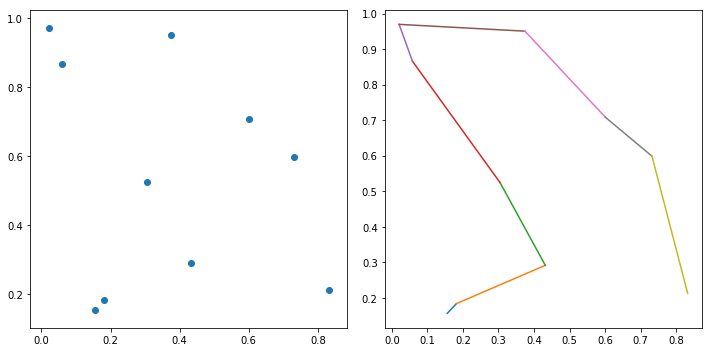

In [7]:
plt.figure(figsize=(10, 5));

plt.subplot(1, 2, 1);
plt.scatter(X[:, 0], X[:, 1]);

plt.subplot(1, 2, 2);
plot_route(X, optimal_path)

plt.tight_layout(); 